# One-sample t test #

# In brevi

A one-sample t test answers these questions:

1. Is the average of a sample different from a specified value?
2. Is the average of a sample less than a specified value?
3. Is the average of a sample greater than a specified value?
4. What is the range of values that is likely to include the population average?

# Contents #

- [Assumptions](#assumptions)
- [How to use this notebook](#how-to-use-this-notebook)
- [Quick-and-dirty](#quick-and-dirty)
- [Graphical analyses](#graphical-analyses)
- [Descriptive statistics](#descriptive-statistics)
- [Hypothesis test method](#hypothesis-test-method)
- [Confidence interval method](#confidence-interval-method)
- [References](#references)
- [Support](#support)

# <a id='assumptions'></a> Assumptions

- The data are continuous ([interval](https://en.wikipedia.org/wiki/Level_of_measurement#Interval_scale) or [ratio](https://en.wikipedia.org/wiki/Level_of_measurement#Ratio_scale) scales).
- The data in a sample follow a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) with mean $\mu$ and variance $\sigma^2$.
- The sample variance $s^2$ follows a $\chi^2$ distribution with $\rho$ degrees of freedom under the null hypothesis, where $\rho$ is a positive constant.
- $(\overline{Y} - \mu)$ and the sample standard deviation $s$ are independent.

# <a id='how-to-use-this-notebook'></a> How to use this notebook #

1. Edit the test parameters.
2. Create a data file.
3. Recalculate all “In” cells.

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.diagnostic as smd
import statsmodels.stats.power as smp
from IPython.display import display_html
from IPython.display import FileLink, FileLinks

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Edit the test parameters ##

Change the following parameters to suit your analysis:

- specified_value
- significance_level

In [2]:
specified_value = 400
significance_level = 0.05

## Create a data file ##

- The data should be in the order in which they were sampled. Do not sort.
- There must be two columns.
    - The **x** column contains the sample numbers, (1, 2, ..., n).
    - The **y** column contains the data values.
- The **x** label is lower case.
- The **y** label is lower case.
- Save it as CSV (comma-separated values) with the name **data_one_sample_t.csv**.
- Put it in the same directory as this notebook.

In [3]:
# A csv data file should be utf-8 encoded. If so, it does not require a utf-8 declaration.
# df = pd.read_csv('data_one_sample_t.csv', encoding='utf-16')
df = pd.read_csv('data_one_sample_t.csv')
x = df['x'][df['x'].notnull()]
y = df['y'][df['y'].notnull()]

## Recalculate ##

- Click **Kernel**.
- Click **Restart & Run All**.


# <a id='quick-and-dirty'></a> Quick-and-dirty #

Here is the minimum code to do a one-sample t test.

## Scenario 1 ##

Is the average of a sample different from a specified value?

H<sub>o</sub>: $\mu$ = specified value. The population average equals the specified value.<br />
H<sub>a</sub>: $\mu$ ≠ specified value. The population average does not equal the specified value.

In [4]:
qdresult = stats.ttest_1samp(y, specified_value)

if qdresult.pvalue < significance_level:
    print('Statistically significant. Test statistic =',
          qdresult.statistic.round(3),
          ', p value = ', qdresult.pvalue.round(3)), '.'
else:
    print('Not statistically significant. Test statistic =',
          qdresult.statistic.round(3),
          ', p value = ', qdresult.pvalue.round(3)), '.'

Statistically significant. Test statistic = -2.252 , p value =  0.034


<span style="color:red">Add power of the test.</span>

## Scenario 2 ##

Is the average of a sample less than a specified value?

H<sub>o</sub>: $\mu$ = specified value. The population average equals the specified value.<br />
H<sub>a</sub>: $\mu$ < specified value. The population average is less than the specified value.

In [5]:
average = np.mean(y)
if specified_value <= average:
    pvalue2 = (1 - qdresult.pvalue.round(3) / 2)
else:
    pvalue2 = qdresult.pvalue / 2

if pvalue2 < significance_level:
    print('Statistically significant. Test statistic =',
          qdresult.statistic.round(3),
          ', p value = ', (pvalue2.round(3))), '.'
else:
    print('Not statistically significant. Test statistic =',
          qdresult.statistic.round(3),
          ', p value = ', (pvalue2.round(3))), '.'

Statistically significant. Test statistic = -2.252 , p value =  0.017


<span style="color:red">Add power of the test.</span>

## Scenario 3 ##

Is the average of a sample greater than a specified value?

H<sub>o</sub>: $\mu$ = specified value. The population average equals the specified value.<br />
H<sub>a</sub>: $\mu$ > specified value. The population average is greater than the specified value.

In [6]:
if specified_value <= average:
    pvalue3 = qdresult.pvalue / 2
else:
    pvalue3 = (1 - qdresult.pvalue.round(3) / 2)

if pvalue3 < significance_level:
    print('Statistically significant. Test statistic =',
          qdresult.statistic.round(3),
          ', p value = ', (pvalue3.round(3)), '.')
else:
    print('Not statistically significant. Test statistic =',
          qdresult.statistic.round(3),
          ', p value = ', (pvalue3.round(3)), '.')

Not statistically significant. Test statistic = -2.252 , p value =  0.983 .


<span style="color:red">Add power of the test.</span>

# <a id='graphical-analyses'></a> Graphical analyses #

## Histogram ##

The histogram may be useful if the sample size is large, typically $n>100$. A good result would be a smooth bell-shaped curve.

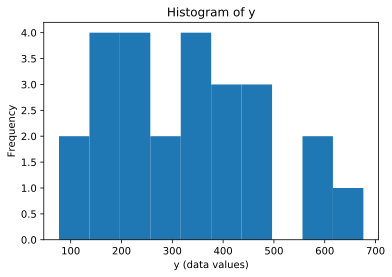

In [7]:
plt.hist(y)
plt.xlabel('y (data values)')
plt.ylabel('Frequency')
plt.title('Histogram of y');

## Box plot ##

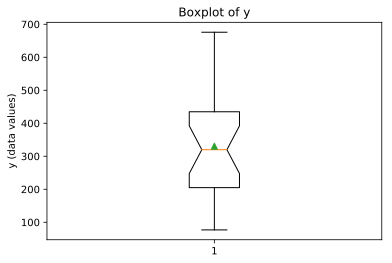

In [8]:
plt.ylabel('y (data values)')
plt.title('Boxplot of y')
plt.boxplot(y, showmeans=True, notch=True);

## Scatter plot ##

The data should be random, with no obvious patterns.

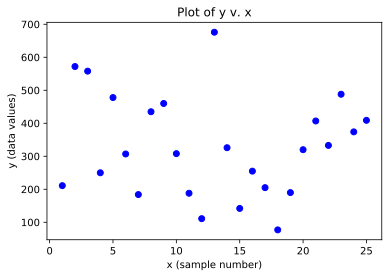

In [9]:
plt.scatter(x, y, color='blue', marker='o')
plt.xlabel('x (sample number)')
plt.ylabel('y (data values)')
plt.title('Plot of y v. x');

## Normal probability plot ##

If the plot looks like a straight line, the data are probably normally distributed.

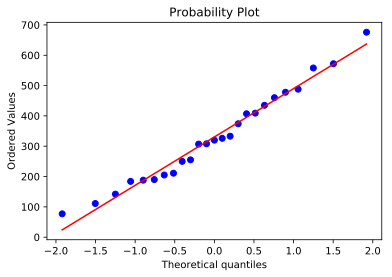

In [10]:
stats.probplot(y, dist=stats.norm, plot=plt);

# Descriptive statistics

Calculate descriptive statistics for y.

In [11]:
n = len(y)
print('Count = ', n)
average = np.mean(y)
print('Average = ', average)
standard_deviation = np.std(y,ddof=1)
print('Sample standard deviation = ', standard_deviation)
standard_error_mean = standard_deviation / np.sqrt(n)
print('Standard error of the mean = ', standard_error_mean)
print('Minimum = ', np.min(y))
print('Maximum = ', np.max(y))

Count =  25
Average =  330.56
Sample standard deviation =  154.177678886
Standard error of the mean =  30.8355357772
Minimum =  77
Maximum =  676


## Lack-of-fit tests ##

### Anderson-Darling ###

In [12]:
adresult = stats.anderson(y, dist='norm')

display_html('H<sub>o</sub>: lack-of-fit = 0' + '<br />' +
             'H<sub>a</sub>: lack-of-fit ≠ 0' + '<br />' +
             'Reject H<sub>o</sub> if the calculated test statistic is &lt; the '
             'critical value.'
             , raw=True)

if adresult.statistic > adresult.critical_values[2]:
    display_html('The Anderson-Darling test statistic = ' +
                 str(adresult.statistic.round(3)) +
                 ' and is > the critical value = ' +
                 str(adresult.critical_values[2].round(3)) +
                 ' at the 0.05 significance level. The data are probably not ' +
                 'normally distributed.', raw=True)
else:
    display_html('The Anderson-Darling test statistic = ' +
                 str(adresult.statistic.round(3)) +
                 ' and is &le; the critical value = ' +
                 str(adresult.critical_values[2].round(3)) +
                 ' at the 0.05 significance level. The data are probably ' +
                 'normally distributed.', raw=True)

H o : lack-of-fit = 0 H a : lack-of-fit ≠ 0 Reject H o if the calculated test statistic is < the critical value.

The Anderson-Darling test statistic = 0.227 and is ≤ the critical value = 0.703 at the 0.05 significance level. The data are probably normally distributed.

### Shapiro-Wilk ###

In [13]:
swresult = stats.shapiro(y)

display_html('H<sub>o</sub>: lack-of-fit = 0' + '<br />' +
             'H<sub>a</sub>: lack-of-fit ≠ 0' + '<br />' +
             'Reject H<sub>o</sub> if the calculated test statistic is &lt; the '
             'critical value.'
             , raw=True)

if swresult[1] < 0.05:
    display_html('The Shapiro-Wilk test statistic = ' +
                 str(round(swresult[0], 3)) +
                 ' has a p value = ' +
                 str(round(swresult[1], 3)) +
                 ' and is therefore statistically significant ' +
                 'at the 0.05 significance level. The data are probably not ' +
                 'normally distributed.', raw=True)
else:
    display_html('The Shapiro-Wilk test statistic = ' +
                 str(round(swresult[0], 3)) +
                 ' has a p value = ' +
                 str(round(swresult[1], 3)) +
                 ' and is therefore not statistically significant ' +
                 'at the 0.05 significance level. The data are probably ' +
                 'normally distributed.', raw=True)

H o : lack-of-fit = 0 H a : lack-of-fit ≠ 0 Reject H o if the calculated test statistic is < the critical value.

The Shapiro-Wilk test statistic = 0.975 has a p value = 0.764 and is therefore not statistically significant at the 0.05 significance level. The data are probably normally distributed.

### Kolmogorov-Smirnov ###

In [14]:
ksresult = smd.kstest_normal(y, pvalmethod='approx')

display_html('H<sub>o</sub>: lack-of-fit = 0' + '<br />' +
             'H<sub>a</sub>: lack-of-fit ≠ 0' + '<br />' +
             'Reject H<sub>o</sub> if the calculated test statistic is &lt; the '
             'critical value.'
             , raw=True)

if ksresult[1] < 0.05:
    display_html('The Kolmogorov-Smirnov test statistic = ' +
                 str(round(ksresult[0], 3)) +
                 ' has a p value = ' +
                 str(round(ksresult[1], 3)) +
                 ' and is therefore statistically significant ' +
                 'at the 0.05 significance level. The data are probably not ' +
                 'normally distributed.', raw=True)
else:
    display_html('The Kolmogorov-Smirnov test statistic = ' +
                 str(round(ksresult[0], 3)) +
                 ' has a p value = ' +
                 str(round(ksresult[1], 3)) +
                 ' and is therefore not statistically significant ' +
                 'at the 0.05 significance level. The data are probably  ' +
                 'normally distributed.', raw=True)


H o : lack-of-fit = 0 H a : lack-of-fit ≠ 0 Reject H o if the calculated test statistic is < the critical value.

The Kolmogorov-Smirnov test statistic = 0.101 has a p value = 0.777 and is therefore not statistically significant at the 0.05 significance level. The data are probably normally distributed.

# <a id='hypothesis-test-method'></a> Hypothesis test method #

To test whether the average of a sample is different from a specified value:

1. Against the two-sided alternative that it is not different from a specified value, or
2. Against the one-sided alternative that it is not less than a specified value, or
3. Against the one-side alternative that it is not greater than a specified value.

The calculated value is defined as:

$$
\begin{aligned}
    t_\text{calculated} = \frac{\overline{y}-\text{specified value}}{s / {\sqrt{n}}} \\
\end{aligned}
$$

The critical value is defined as:

$$
\begin{aligned}
    t_\text{critical} = t_{1- \alpha / 2 \, \text{,} \, n-1} \,\, \text{two-sided, or} \\
    t_\text{critical} = t_{1- \alpha \, \text{,} \, n-1} \,\, \text{one-sided}\\
\end{aligned}
$$

where:

$$
\begin{align*}
    \overline{y}                & = \text{the sample average} \\
    s                           & = \text{the sample standard deviation} \\
    n                           & = \text{the number of observations in the sample} \\
    \alpha                      & = \text{the significance level} \\
    \nu                         & = \text{the degrees of freedom} = n-1 \\
    t_{1- \alpha / 2 \, \text{,} \, \nu} & = \text{the $100(1-\alpha/2)$ percentile of the t distribution with $\nu$ degrees of freedom} \\
    t_{1- \alpha \, \text{,} \, \nu} & = \text{the $100(1-\alpha)$ percentile of the t distribution with $\nu$ degrees of freedom} \\
\end{align*}
$$

There are three possible scenarios.

## Scenario 1 ##

Is the average of a sample different from a specified value?

H<sub>o</sub>: $\mu$ = specified value. The population average equals the specified value.<br />
H<sub>a</sub>: $\mu$ ≠ specified value. The population average does not equal the specified value.

The critical value for a two-sided (two-tailed) test is:

$$
\begin{aligned}
    t_\text{critical} = t_{1- \alpha / 2 \, \text{,} \, n-1} \\
\end{aligned}
$$

Reject H<sub>o</sub> if |t<sub>calculated</sub>| > t<sub>critical</sub> .

In [15]:
t_calculated = (average - specified_value) / standard_error_mean
t_critical_1 = stats.t.isf(significance_level / 2, n - 1)
p_value_1 = stats.t.sf(np.abs(t_calculated), n - 1) * 2
display_html('H<sub>o</sub>: sample average = ' + str(specified_value) + '<br />' +
             'H<sub>a</sub>: sample average ≠ ' + str(specified_value) + '<br />' +
             't<sub>calculated</sub> = ' + str(t_calculated.round(3)) + '<br />' +
             'p value for t<sub>calculated</sub> = ' + str(p_value_1.round(3)) + '<br />'
             't<sub>critical</sub> = ' + str(t_critical_1.round(3)) +
             ' (two-tail)'
             , raw=True)

H o : sample average = 400 H a : sample average ≠ 400 t calculated = -2.252 p value for t calculated = 0.034 t critical = 2.064 (two-tail)

In [16]:
if abs(t_calculated) > t_critical_1:
    display_html('The average ' + str(average.round(3)) + ' of the sample is ' +
             'statistically, significantly different from the specified value ' +
             str(specified_value) +
             ' because | t<sub>calculated</sub> | &gt; t<sub>critical</sub>.', raw=True)
else:
    display_html('The average ' + str(average.round(3)) + ' of the sample is not ' + 
             'statistically, significantly different from the specified value ' +
             str(specified_value) + 
             ' because | t<sub>calculated</sub> | &le; t<sub>critical</sub>.', raw=True)

The average 330.56 of the sample is statistically, significantly different from the specified value 400 because | t calculated | > t critical .

### Power of the test

In [17]:
effectsize = np.abs(specified_value - average)
print('Effect size = ', effectsize)

Effect size =  69.44


In [18]:
print("power1 = smp.ttest_power",
      "(effect_size={effectsize}, nobs={n}, alpha={significance_level}, alternative='two-sided')".format(
          effectsize=effectsize,
          n=n,
          significance_level=significance_level), sep='')
power1 = smp.ttest_power(effectsize, n, significance_level, alternative='two-sided')
print('Power of the test = ', power1)

power1 = smp.ttest_power(effect_size=69.44, nobs=25, alpha=0.05, alternative='two-sided')
Power of the test =  1.0


## Scenario 2 ##

Is the average of a sample less than a specified value?

H<sub>o</sub>: $\mu$ = specified value. The population average equals the specified value.<br />
H<sub>a</sub>: $\mu$ < specified value. The population average is less than the specified value.

The critical value for a one-sided (left-tailed) test is:

$$
\begin{aligned}
    t_\text{critical} = t_{1- \alpha \, \text{,} \, n-1} \\
\end{aligned}
$$

Reject H<sub>o</sub> if t<sub>calculated</sub> < t<sub>critical</sub> .

In [19]:
t_critical_2 = -1 * stats.t.isf(significance_level, n - 1)
p_value_2 = 1 - stats.t.sf((t_calculated), n - 1)
display_html('H<sub>o</sub>: sample average = ' + str(specified_value) + '<br />' +
             'H<sub>a</sub>: sample average < ' + str(specified_value) + '<br />' +
             't<sub>calculated</sub> = ' + str(t_calculated.round(3)) + '<br />' +
             'p value for t<sub>calculated</sub> = ' + str(p_value_2.round(3)) + '<br />'
             't<sub>critical</sub> = ' + str(t_critical_2.round(3)) +
             ' (left-tail)' + '<br />'
             , raw=True)

H o : sample average = 400 H a : sample average < 400 t calculated = -2.252 p value for t calculated = 0.017 t critical = -1.711 (left-tail)

In [20]:
if t_calculated < t_critical_2:
    display_html('The average ' + str(average.round(3)) + ' of the sample is ' + 
             'statistically, significantly different from the specified value ' +
             str(specified_value) + 
             ' because t<sub>calculated</sub> &lt; t<sub>critical</sub>.', raw=True)
else:
    display_html('The average ' + str(average.round(3)) + ' of the sample is not ' + 
             'statistically, significantly different from the specified value ' +
             str(specified_value) + 
             ' because t<sub>calculated</sub> &ge; t<sub>critical</sub>.', raw=True)

The average 330.56 of the sample is statistically, significantly different from the specified value 400 because t calculated < t critical .

### Power of the test

<span style="color:red">Add power of the test.</span>

## Scenario 3 ##

Is the average of a sample greater than a specified value?

H<sub>o</sub>: $\mu$ = specified value. The population average equals the specified value.<br />
H<sub>a</sub>: $\mu$ > specified value. The population average is greater than the specified value.

The critical vlue for a one-sided (right-tailed) test is:

$$
\begin{aligned}
    t_\text{critical} = t_{\alpha \, \text{,} \, n-1} \,\, \text{one-sided}\\
\end{aligned}
$$

Reject H<sub>o</sub> if t<sub>calculated</sub> > t<sub>critical</sub>.

In [21]:
t_critical_3 = stats.t.isf(significance_level, n - 1)
p_value_3 = stats.t.sf((t_calculated), n - 1)
display_html('H<sub>o</sub>: sample average = ' + str(specified_value) + '<br />' +
             'H<sub>a</sub>: sample average > ' + str(specified_value) + '<br />' +
             't<sub>calculated</sub> = ' + str(t_calculated.round(3)) + '<br />' +
             'p value for t<sub>calculated</sub> = ' + str(p_value_3.round(3)) + '<br />'
             't<sub>critical</sub> = ' + str(t_critical_3.round(3)) +
             ' (right-tail)' + '<br />'
             , raw=True)

H o : sample average = 400 H a : sample average > 400 t calculated = -2.252 p value for t calculated = 0.983 t critical = 1.711 (right-tail)

In [22]:
if t_calculated > t_critical_3:
    display_html('The average ' + str(average.round(3)) + ' of the sample is ' + 
             'statistically, significantly different from the specified value ' +
             str(specified_value) + 
             ' because t<sub>calculated</sub> &gt; t<sub>critical</sub>.', raw=True)
else:
    display_html('The average ' + str(average.round(3)) + ' of the sample is not ' + 
             'statistically, significantly different from the specified value ' +
             str(specified_value) + 
             ' because t<sub>calculated</sub> &le; t<sub>critical</sub>.', raw=True)

The average 330.56 of the sample is not statistically, significantly different from the specified value 400 because t calculated ≤ t critical .

### Power of the test

<span style="color:red">Add power of the test.</span>

# <a id='confidence-interval-method'></a> Confidence interval method #

The hypothesis test results in either a reject-the-null-hypothesis or a fail-to-reject-the-null-hypothesis decision. Another way is to construct a confidence interval around the true but unknown average. The confidence intervals are constructed so that the probability of the interval containing the average is $1-\alpha$. Such intervals are referred to as $100(1-\alpha) \text{ %}$ confidence intervals.

## Scenario 1 ##

What is the range of values that is likely to include the population average?

The two-sided confidence interval for $\mu$ is:

$$
\begin{aligned}
    \overline{y} + \frac{s}{\sqrt{n}} t_{\alpha / 2 , \, \nu } \leq \mu \leq
    \overline{y} + \frac{s}{\sqrt{n}} t_{1- \alpha / 2 , \, \nu }
\end{aligned}
$$

where:

$$
\begin{align*}
    \overline{y}                & = \text{the sample average} \\
    s                           & = \text{the sample standard deviation} \\
    n                           & = \text{the number of observations in the sample} \\
    \alpha                      & = \text{the significance level} \\
    \nu                         & = \text{the degrees of freedom} = n-1 \\
    t_{1- \alpha / 2 \, \text{,} \, \nu} & = \text{the $100(1-\alpha/2)$ percentile of the t distribution with $\nu$ degrees of freedom} \\
    t_{1- \alpha \, \text{,} \, \nu} & = \text{the $100(1-\alpha)$ percentile of the t distribution with $\nu$ degrees of freedom} \\
\end{align*}
$$

Reject H<sub>o</sub> if the specified value is not within the confidence interval.

In [23]:
tvalue_alpha_by_two = -1 * stats.t.isf(significance_level / 2, n-1)
lower_bound = average + standard_error_mean * tvalue_alpha_by_two
tvalue_one_minus_alpha_by_two = stats.t.isf(significance_level / 2, n-1)
upper_bound = average + standard_error_mean * tvalue_one_minus_alpha_by_two

display_html('The two-sided confidence interval for $\mu$ is:' + '<br />' +
             str(lower_bound.round(3)) + '$\leq \mu \leq$' + str(upper_bound.round(3))
             , raw=True)

The two-sided confidence interval for $\mu$ is: 266.919$\leq \mu \leq$394.201

In [24]:
if specified_value < lower_bound or specified_value > upper_bound:
    display_html('The average ' + str(average.round(3)) + ' of the sample is ' +
             'statistically, significantly different from the specified value ' +
             str(specified_value) +
             ' because the specified value is not within the confidence interval.', raw=True)
else:
    display_html('The average ' + str(average.round(3)) + ' of the sample is not ' + 
             'statistically, significantly different from the specified value ' +
             str(specified_value) + 
             ' because the specified value is within the confidence interval.', raw=True)

The average 330.56 of the sample is statistically, significantly different from the specified value 400 because the specified value is not within the confidence interval.

## Scenario 2 ##

What is the range of values that is likely to include the population average?

The upper one-sided confidence interval for $\mu$ is:

$$
\begin{aligned}
    \overline{y} + \frac{s}{\sqrt{n}} t_{\alpha , \, \nu } \leq \mu
\end{aligned}
$$

Reject H<sub>o</sub> if the specified value is $>$ the upper confidence interval.

In [25]:
tvalue_alpha_2 = stats.t.isf(significance_level, n-1)
upper_bound = average + standard_error_mean * tvalue_alpha_2

display_html('The upper one-sided confidence interval for $\mu = $ ' +
             str(upper_bound.round(3))
             , raw=True)

The upper one-sided confidence interval for $\mu = $ 383.316

In [26]:
if specified_value > upper_bound:
    display_html('The average ' + str(average.round(3)) + ' of the sample is ' +
             'statistically, significantly $<$ the specified value ' +
             str(specified_value) +
             ' because the specified value is $>$ the upper confidence interval.'
             , raw=True)
else:
    display_html('The average ' + str(average.round(3)) + ' of the sample is not ' + 
             'statistically, significantly $<$ the specified value ' +
             str(specified_value) + 
             ' because the specified value is $&#8815;$ the upper confidence interval.'
             , raw=True)

The average 330.56 of the sample is statistically, significantly $<$ the specified value 400 because the specified value is $>$ the upper confidence interval.

## Scenario 3 ##

What is the range of values that is likely to include the population average?

The lower one-sided confidence interval for $\mu$ is:
$$
\begin{aligned}
    \mu \leq
    \overline{y} + \frac{s}{\sqrt{n}} t_{1- \alpha , \, \nu }
\end{aligned}
$$

Reject H<sub>o</sub> if the specified value is $<$ the lower confidence interval.

In [27]:
tvalue_alpha_3 = -1 * stats.t.isf(significance_level, n-1)
lower_bound = average + standard_error_mean * tvalue_alpha_3

display_html('The lower one-sided confidence interval for $\mu = $ ' +
             str(lower_bound.round(3))
             , raw=True)

The lower one-sided confidence interval for $\mu = $ 277.804

In [28]:
if specified_value < lower_bound:
    display_html('The average ' + str(average.round(3)) + ' of the sample is ' +
             'statistically, significantly > the specified value ' +
             str(specified_value) +
             ' because the specified value is $<$ the lower confidence interval.'
             , raw=True)
else:
    display_html('The average ' + str(average.round(3)) + ' of the sample is not ' + 
             'statistically, significantly > the specified value ' +
             str(specified_value) + 
             ' because the specified value is $&#8814;$ the lower confidence interval.'
             , raw=True)

The average 330.56 of the sample is not statistically, significantly > the specified value 400 because the specified value is $≮$ the lower confidence interval.

# References #

- [Minitab. “Family energy cost data.”](http://support.minitab.com/en-us/datasets/basic-statistics-data-sets/family-energy-cost-data/)
- [NIST. *Engineering Statistics Handbook*.](http://www.itl.nist.gov/div898/handbook/eda/section3/eda352.htm)
- [Wikipedia. “Confidence interval.”](https://en.wikipedia.org/wiki/Confidence_interval)
- [Wikipedia. “Normal probability plot.”](https://en.wikipedia.org/wiki/Normal_probability_plot)
- [Wikipedia. “One-sample t-test”](https://en.wikipedia.org/wiki/Student%27s_t-test#One-sample_t-test)

# Support #

## Python librairies ##

- [matplotlib](https://github.com/matplotlib/matplotlib)
- [numpy](https://github.com/numpy/numpy)
- [pandas](https://github.com/pydata/pandas)
- [scipy](https://github.com/scipy/scipy)
- [statsmodels](https://github.com/statsmodels/statsmodels/)

## Data sets ##

These data sets were used to test this notebook. They can also be used as examples for further study.

1. [Minitab. “Family energy cost data.”](minitab_family_energy_cost.csv) Specified value = 200.
2. [NIST. ZARR13.DAT. Full set of 195 values.](nist_zarr13_full.csv) Specified value = 5.
3. [NIST. ZARR13.DAT. Partial set of 50 values.](nist_zarr13_partial.csv) Specified value = 5.
4. [NIST. wafer data.](nist_wafers.csv) Specified value = 50.
5. [shelf life data.](shelf_life.csv) Specified value = 125.
6. [volume](volume.csv) Specified value = 500.
7. [height](height.csv) Specified value = 82.
8. [weight loss](weigth_loss.csv) Specified value = 0.

<span style="color:red">Find two additional data sets. Is the one I'm using now in the above list?</span>

## Enhancements ##

- How to I do page breaks in Jupyter?
- Test all ten samples to validate the calculations.
- Find t test tables and create a link to online version or to pdf version on my website.
- Post hoc analysis: power, sample size.

- [basic stats](http://cogmaster-stats.github.io/python-cogstats/basic_statistics.html)
- [data analysis](http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html)

# Colophon #

This notebook was created with [Jupyter Notebook](http://jupyter.org/) software and the [Python programming language](https://www.python.org/) kernel.

Updated 2017-03-25.

<a href="mailto:gilles.pilon@forteconsultants.ca">Gilles Pilon</a>.